In [1]:
import tensorflow as tf
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
tf.enable_eager_execution()

In [3]:
def model(X, hidden_weights, hidden_bias, ow):
    Z = tf.matmul(X, hidden_weights) + hidden_bias
    A = tf.nn.sigmoid(Z)
    return tf.matmul(A, ow)

In [4]:
train_samples = 200
test_samples = 60
total_samples = train_samples + test_samples
epochs = 110

In [15]:
dsX = np.linspace(-1, 1, total_samples).reshape(-1, 1)
dsX = dsX.astype("float")
dsY = 0.4 * np.power(dsX, 2) + 2 * dsX + 0.8 + np.random.randn(*dsX.shape) * 0.22
dsY = dsY.astype("float")

dsX, dsY = shuffle(dsX, dsY)

trainX, trainY = dsX[: train_samples, :], dsY[: train_samples, :]
testX, testY = dsX[train_samples: total_samples, :], dsY[train_samples: total_samples, :]

In [16]:
trainX

array([[-0.72200772],
       [-0.18146718],
       [ 0.003861  ],
       [ 0.37451737],
       [ 0.2972973 ],
       [-0.93822394],
       [ 0.47490347],
       [-0.94594595],
       [-0.53667954],
       [ 0.56756757],
       [-0.02702703],
       [-0.87644788],
       [-0.89189189],
       [ 0.75289575],
       [-0.50579151],
       [-0.84555985],
       [ 0.03474903],
       [ 0.8996139 ],
       [-0.2046332 ],
       [-0.76833977],
       [-0.33590734],
       [ 0.36679537],
       [-0.15830116],
       [-0.75289575],
       [ 0.4980695 ],
       [-0.28957529],
       [ 0.81467181],
       [-0.67567568],
       [ 0.69111969],
       [-0.98455598],
       [ 0.05791506],
       [-0.52895753],
       [-0.83783784],
       [-0.44401544],
       [-0.41312741],
       [-0.45945946],
       [-0.43629344],
       [ 0.08108108],
       [ 0.27413127],
       [ 0.13513514],
       [-0.86100386],
       [ 0.97683398],
       [ 0.45173745],
       [ 0.70656371],
       [-0.35907336],
       [-0

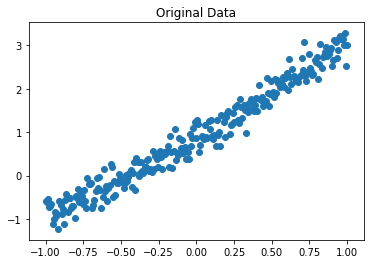

In [12]:
plt.figure()
plt.title("Original Data")
plt.scatter(dsX, dsY)
plt.show()

In [8]:
hw1 = tf.get_variable(name="hw1", shape=[1, 10], dtype=tf.float32, \
                      initializer=tf.random_normal_initializer)
b = tf.get_variable(name="b", shape=[1, 10], dtype=tf.float32, \
                   initializer=tf.random_normal_initializer)
ow = tf.get_variable(name="ow", shape=[10, 1], dtype=tf.float32, \
                    initializer=tf.random_normal_initializer)
                      

In [22]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-1)
variables = [hw1, b, ow]
for epoch_id in range(epochs):
    trainX, trainY = shuffle(trainX, trainY)
    
    with tf.GradientTape() as tape:
        y_pred = model(tf.convert_to_tensor(trainX, dtype=tf.float32), hw1, b, ow)
        loss = tf.reduce_mean(tf.square(trainY - y_pred))
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(grads_and_vars=zip(gradients, variables))
    cost = tf.reduce_mean(tf.square(testY - model(tf.convert_to_tensor(testX, dtype=tf.float32), hw1, b, ow)))
    if epoch_id % 10 == 0:
        print("epoch_id: %d, loss: %.4f" %(epoch_id, cost))
        
    

epoch_id: 0, loss: 0.1336
epoch_id: 10, loss: 0.1036
epoch_id: 20, loss: 0.0651
epoch_id: 30, loss: 0.0649
epoch_id: 40, loss: 0.0640
epoch_id: 50, loss: 0.0671
epoch_id: 60, loss: 0.0635
epoch_id: 70, loss: 0.0631
epoch_id: 80, loss: 0.0632
epoch_id: 90, loss: 0.0630
epoch_id: 100, loss: 0.0629


## 非线性回归预测汽车燃烧效率

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow.contrib.learn as skflow
import pandas as pd

In [30]:
df = pd.read_csv("mpg.csv")
feature_columns = ["cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin"]

X = df[feature_columns].values
y = df["mpg"].values

In [33]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [34]:
feature_cols = [tf.contrib.layers.real_valued_column(k) for k in feature_columns]


In [36]:
model_dir = "/Users/youliyuan/ML/TensorFlow/Building Machine Learning with TensorFlow"

In [39]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-2)
regressor = skflow.DNNRegressor(hidden_units=[10, 5],
                                optimizer=optimizer,
                                feature_columns=feature_cols,
                                model_dir=model_dir
                               )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c3e344cc0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/Users/youliyuan/ML/TensorFlow/Building Machine Learning with TensorFlow'}


In [43]:
def input_fn(df, label):
    feature_cols = {k: tf.constant(df[:,i]) for i, k in enumerate(feature_columns)}
    label = tf.constant(label)
    return feature_cols, label


def train_input_fn():
    return input_fn(X_train, y_train)


def test_input_fn():
    return input_fn(X_test, y_test)

In [41]:
regressor.fit(input_fn=train_input_fn, steps=500)

Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.EstimatorSpec. You can use the `estimator_spec` method to create an equivalent one.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /Users/youliyuan/ML/TensorFlow/Building Machine Learning with TensorFlow/model.ckpt.
INFO:tensorflow:loss = 668.05597, step = 1
INFO:tensorflow:global_step/sec: 379.907
INFO:tensorflow:loss = 15.777695, step = 101 (0.265 sec)
INFO:tensorflow:global_step/sec: 834.918
INFO:tensorflow:loss = 9.30322, step = 201 (0.118 sec)
INFO:tensorflow:global_step/sec: 801.463
INFO:tensorflow:loss = 7.6235304, step = 301 (0.125 sec)
INFO:tensorflow:global_step/sec: 860.215
INFO:tensorflow:loss = 6.9125543, step = 401 (0.116 sec)
INFO:tensorflow:Saving checkpoints for 500 into /Users/youliyuan/ML/TensorFlow/Building Machine Learni

DNNRegressor(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._RegressionHead object at 0x1c3e344b38>, 'hidden_units': [10, 5], 'feature_columns': (_RealValuedColumn(column_name='cylinders', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='displacement', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='horsepower', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='weight', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='acceleration', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='model_year', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='origin', dimension=1, default_value=None, dtype=tf.float32, normalizer=None)), 'optimizer': <tensorflow.python.training.ad

In [48]:
result = regressor.predict(input_fn=test_input_fn, as_iterable=False)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /Users/youliyuan/ML/TensorFlow/Building Machine Learning with TensorFlow/model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [45]:
ev = regressor.evaluate(input_fn=test_input_fn, steps=1)
print('ev: {}'.format(ev))

INFO:tensorflow:Starting evaluation at 2019-03-14-07:09:03
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /Users/youliyuan/ML/TensorFlow/Building Machine Learning with TensorFlow/model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-03-14-07:09:03
INFO:tensorflow:Saving dict for global step 500: global_step = 500, loss = 12.317752
ev: {'loss': 12.317752, 'global_step': 500}


In [49]:
result

array([35.570004 , 18.601168 , 17.782495 , 12.066157 , 20.218079 ,
       15.100686 , 16.59597  , 32.16015  , 15.094185 , 17.09676  ,
       16.135637 , 33.908997 , 22.574593 , 31.603096 , 32.265247 ,
       26.906483 , 35.60558  , 23.92249  , 12.914478 , 24.190992 ,
       19.097963 , 25.81225  , 21.330147 , 15.688859 , 28.068066 ,
       32.207096 , 19.163954 , 15.81074  , 16.44898  , 24.014702 ,
       30.28896  , 37.200836 , 27.999287 , 22.043852 , 20.800264 ,
       12.468895 , 34.288635 , 14.396342 , 17.372038 , 20.802942 ,
       22.75381  , 29.573751 , 27.039469 , 13.214736 , 12.538824 ,
       14.022063 , 15.790554 , 16.061932 , 20.953138 , 27.576881 ,
       35.45637  , 18.614721 , 13.833896 , 26.916565 , 26.480614 ,
       25.037966 , 24.267355 , 16.820555 , 24.021664 , 20.343616 ,
       21.44248  , 14.526065 , 24.467426 , 11.793122 , 22.972124 ,
       42.206543 , 12.467068 , 24.972866 , 30.583826 , 17.371702 ,
       11.31699  , 28.093029 , 26.589611 , 30.428108 , 23.6429

In [50]:
mse = mean_squared_error(y_pred=result, y_true=y_test)
print("Total MSE: " + str(mse))

Total MSE: 12.317750404449464
